### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.3.5 Banknote Authentication 

In this exercise we will implement the same neural network of XOR exercise for a new dataset Banknote Authentication.

This dataset contains 5 columns: 4 for input data and the last column contains the output data. 

For plotting purposes we will only consider two inputs, it could be the first two, the second and the third, the last two, or the first and the last. You will plot these two inputs like $x_1$ and $x_2$, and their classification, as we did in the XOR example.

The steps to follow are:
1. Load dataset (only two inputs)
2. Split dataset
3. Plot the training dataset
4. Implement the Neural Network (NN) algorithm:
    1. Initialize W's and b's
    2. Implement sigmoid function and forward function
    3. Implement cost and sigmoid derivate functions
    4. Implement backpropagation function
    5. Implement and execute the NN model
    6. Implement prediction, accuracy, and decision boundary functions
    7. Plot the prediction for Training dataset with its decision boundary
    8. Add 3, 4, 5, and 6 neurons to the hidden layer of the NN
    9. Repeat steps 7 and 8 for the Testing dataset.
5. Write some conclusions according the results obtained.
    

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as split_data

In [2]:
# 1. Load dataset
bankdata = pd.read_csv('./Datasets/data_banknote_authentication.txt', header = None)
print(bankdata.head(10), '\n')

bankdata = np.array(bankdata)

x = bankdata[:, : 2]
y = bankdata[:, -1]

print(x, y, sep='\n\n')

         0       1        2        3  4
0  3.62160  8.6661 -2.80730 -0.44699  0
1  4.54590  8.1674 -2.45860 -1.46210  0
2  3.86600 -2.6383  1.92420  0.10645  0
3  3.45660  9.5228 -4.01120 -3.59440  0
4  0.32924 -4.4552  4.57180 -0.98880  0
5  4.36840  9.6718 -3.96060 -3.16250  0
6  3.59120  3.0129  0.72888  0.56421  0
7  2.09220 -6.8100  8.46360 -0.60216  0
8  3.20320  5.7588 -0.75345 -0.61251  0
9  1.53560  9.1772 -2.27180 -0.73535  0 

[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]

[0. 0. 0. ... 1. 1. 1.]


In [3]:
# 2. Split dataset
X_train, X_test, y_train, y_test = split_data(x, y, test_size = 0.3, random_state = 1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Train dataset:', X_train.shape, y_train.shape)
print('Test dataset:', X_test.shape, y_test.shape)

Train dataset: (960, 2) (960, 1)
Test dataset: (412, 2) (412, 1)


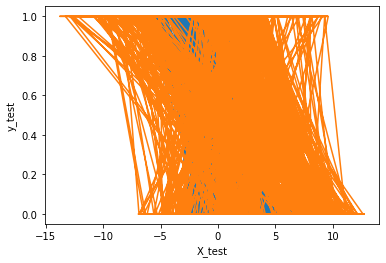

In [4]:
# 3. Plot the training dataset
f, ax = plt.subplots()
ax.plot(X_train, y_train)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

In [5]:
# 4. Neural Network
# 4.A Initialize W's and b's
def init_w(m, nh, ny):
    np.random.seed(2)
    
    #w´s willbe created randomly
    #b's will be zeros
    W1= np.random.randn(nh, m) * 0.01
    b1= np.zeros((1,nh))
    W2= np.random.randn(nh, nh) * 0.01
    b2= np.zeros((1,nh))
    
    W3 = np.random.randn(ny, nh) * 0.01
    b3= np.zeros((ny,1))
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return W

#Testing the function
m = x.shape[1] # features on x
nh = 2 # hidden neurons
ny = 1 # outputs units

W = init_w(m, nh, ny)
print(W['W1'].shape, 'W1:\n', W['W1'])
print(W['b1'].shape, 'b1:\n', W['b1'])
print(W['W2'].shape, 'W2:\n', W['W2'])
print(W['b2'].shape, 'b2:\n', W['b2'])
print(W['W3'].shape, 'W3:\n', W['W3'])
print(W['b3'].shape, 'b3:\n', W['b3'])

(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(1, 2) b1:
 [[0. 0.]]
(2, 2) W2:
 [[-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
(1, 2) b2:
 [[0. 0.]]
(1, 2) W3:
 [[-0.01057952 -0.00909008]]
(1, 1) b3:
 [[0.]]


In [6]:
# 4.B Implement sigmoid function and forward function
#Sigmoid function
def sigmoid(z):
    g = 1/(1+ np.exp(-z))
    return g

#Implement forward propagation to calculate ouput probabilites
def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    
    W3 = W['W3']
    b3 = W['b3']
    
    a1 = x
    Z2 = np.dot(a1, W1.T) + b1
    
    a2 = sigmoid(Z2)
    Z3 = np.dot(a2, W2.T) + b2
    
    a3 = sigmoid(Z3)
    Z4 = np.dot(a3, W3.T) + b3

    a4 = sigmoid(Z4)
    Z = {'Z2': Z2, 'a2': a2, 'Z3': Z3, 'a3': a3, 'Z4': Z4, 'a4': a4}
    return a4, Z

In [7]:
# 4.C Implement cost and sigmoid derivate functions
#Cost function
def cost(a, y):
    J = 1/2 * np.sum((a - y)**2)
    #J = np.sum((a - y)**2)
    return J

#Derivative of sigmoid function
def d_sigmoid(z):
    ds = sigmoid(z) * (1 - sigmoid(z))
    return ds

In [8]:
# 4.D Implement backpropagation function
# Backpropagation algorithm
def backp(W, Z, X, y):
    m = X.shape[1]
    
    W1 = W['W1']
    W2 = W['W2']
    W3 = W['W3']
    
    a2 = Z['a2']
    a3 = Z['a3']
    a4 = Z['a4']
    
    Z2 = Z['Z2']
    Z3 = Z['Z3']
    Z4 = Z['Z4']

    d4 = a4 - y
    d3 = np.dot(d4, W3) * d_sigmoid(Z3)
    d2 = np.dot(d3, W2) * d_sigmoid(Z2)

    dW1 = (1/m) * np.dot(d2.T, X)
    dW2 = (1/m) * np.dot(d3.T, a2)
    dW3 = (1/m) * np.dot(d4.T, a3)
    
    db1 = (1/m) * np.sum(d2, axis = 0)
    db2 = (1/m) * np.sum(d3, axis = 0)
    db3 = (1/m) * np.sum(d4)

    grad = {'dW1': dW1, 'dW2': dW2, 'dW3': dW3, 'db1': db1, 'db2': db2, 'db3': db3}
    return grad

Initial cost: 119.88781576418673
Final cost: 22.314233855868153
W1 = [[-0.7421928   0.12652959]
 [-2.11074951 -3.49917608]]
b1 =  [[ 2.02194077 22.13008841]]
W2 =  [[-4.43130685 -3.67130661]
 [-3.50259449 -3.40334334]]
b2 =  [[7.71036652 5.73432989]]
W3 =  [[-10.94645334  -9.81499906]]
b3 =  [[10.76089381]]


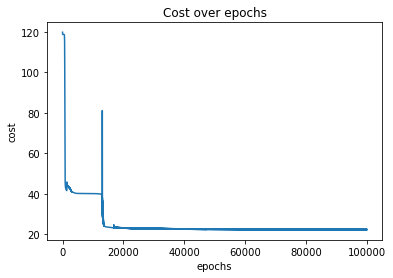

In [9]:
# 4.E Implement and execute the NN model
def bank_model(x, y, nh, alpha = 0.001, epochs = 10000):
    np.random.seed(2)
    m = x.shape[1]
    ny = 1
    W = init_w(m, nh, ny)
    
    a4, z = forward(x, W)
    print('Initial cost:', cost(a4, y))
    
    J = []
    for i in range(epochs):
        a4, Z = forward(x, W)
        J.append(cost(a4, y))
        
        grad = backp(W, Z, x, y)
        
        W['W1'] = W['W1'] - alpha * grad['dW1']
        W['W2'] = W['W2'] - alpha * grad['dW2']
        W['W3'] = W['W3'] - alpha * grad['dW3']
        W['b1'] = W['b1'] - alpha * grad['db1']
        W['b2'] = W['b2'] - alpha * grad['db2']
        W['b3'] = W['b3'] - alpha * grad['db3']
        
        
    print('Final cost:', J[epochs-1])
    return W, J

W, J = bank_model(X_train, y_train, nh, alpha= 0.001, epochs=100000)

print('W1 =', W['W1'])
print("b1 = ", W['b1'])
print("W2 = ", W['W2'])
print("b2 = ", W['b2'])
print("W3 = ", W['W3'])
print("b3 = ", W['b3'])

plt.plot(J)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost');

In [10]:
# 4.F Implement prediction, accuracy, and decision boundary functions
def predict(x, W):
    a4, Z = forward(x, W)
    y_hat = list(map(lambda x: 1 if x > 0.5 else 0, a4))
    y_hat = np.array(y_hat)
    y_hat = y_hat.reshape(-1, 1)
    
    return y_hat

def accuracy(y_hat, y):
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn / m
    
    return acc

def decision_boundary(x, y, w, ax):
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z1 = predict(np.c_[xx.ravel(), yy.ravel()], w)
    
    Z1 = Z1.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z1, cmap =plt.cm.tab20c)
    ax.scatter(x[:, 0], x[:, 1], c = y.squeeze(), cmap=plt.cm.tab20c)

Text(0, 0.5, 'x2')

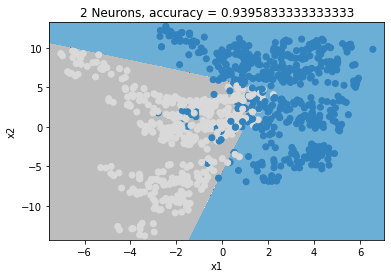

In [11]:
# 4.G Plot the prediction for Training dataset with its decision boundary
y_hat = predict(X_train, W)
acc = accuracy(y_hat, y_train)
ax = plt.subplot()
decision_boundary(X_train, y_train, W, ax)
ax.set_title('2 Neurons, accuracy = ' + str(acc))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Initial cost: 120.03312530598419
Final cost: 47.1879242253783
Initial cost: 119.86354159344775
Final cost: 20.184637127659187
Initial cost: 120.09419760993289
Final cost: 20.611293618211324
Initial cost: 119.96585867717917
Final cost: 17.438560414276218


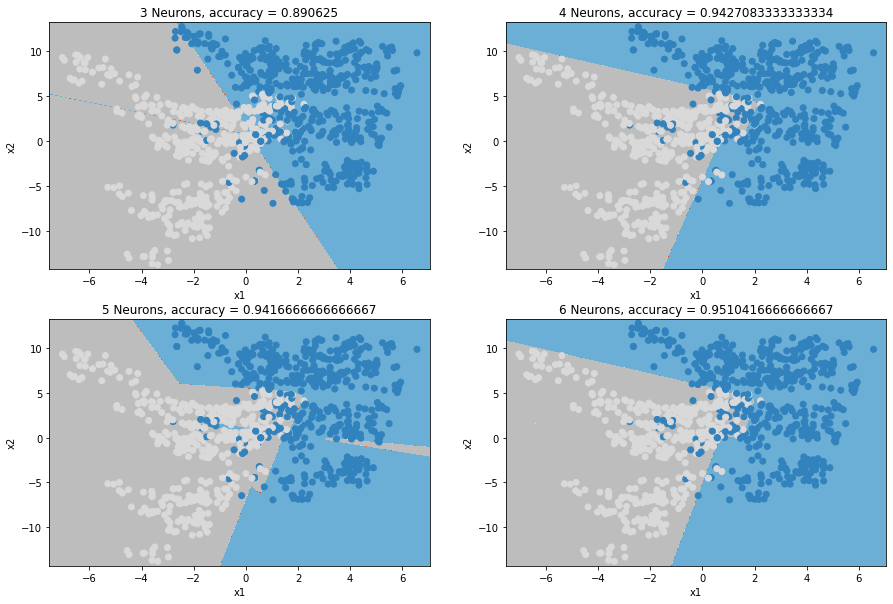

In [12]:
# 4.H Add 3, 4, 5, and 6 neurons to the hidden layer of the NN
hidden = [3, 4, 5, 6]
axi = 1
f, axa = plt.subplots(2, 2, figsize = (15,10))

for h in hidden:
    W, J = bank_model(X_train, y_train, h, alpha = 0.04, epochs = 40000)
    y_hat = predict(X_train, W)
    acc = accuracy(y_hat, y_train)
    
    ax = plt.subplot(2, 2, axi)
    axi = axi + 1
    decision_boundary(X_train, y_train, W, ax)
    ax.set_title( str(h)+' Neurons, accuracy = ' + str(acc))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

Initial cost: 51.52040216116839
Final cost: 9.719784099158955
Initial cost: 51.41499541533507
Final cost: 13.326013109268763
Initial cost: 51.557779085607905
Final cost: 9.049978092827075
Initial cost: 51.4788888397088
Final cost: 10.487185316099815


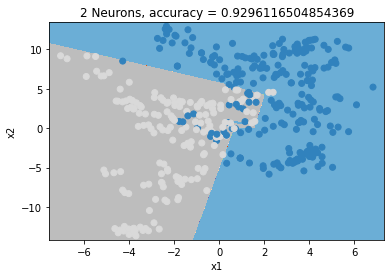

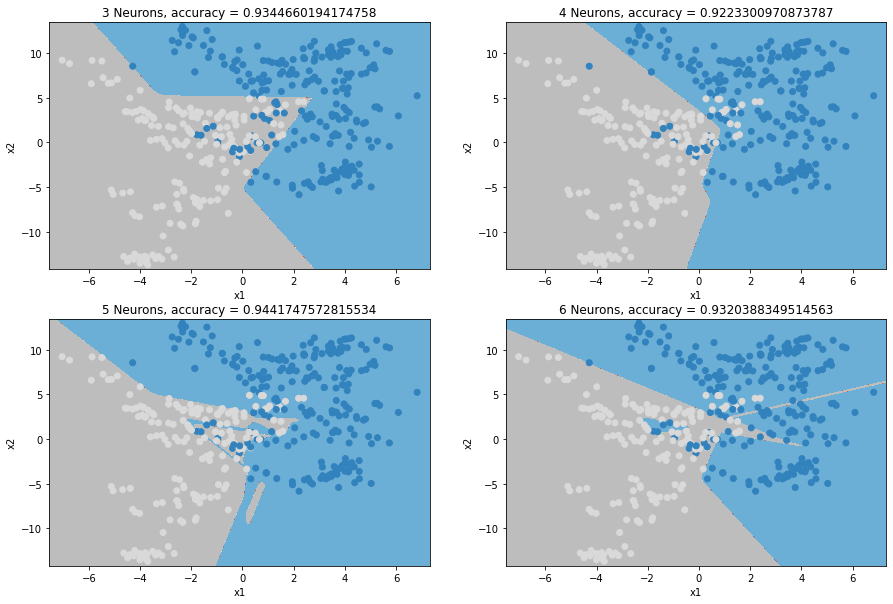

In [13]:
# 4.I Repeat steps 7 (G) and 8 (H) for the Testing dataset.
y_hat = predict(X_test, W)
acc = accuracy(y_hat, y_test)
ax = plt.subplot()
decision_boundary(X_test, y_test, W, ax)
ax.set_title('2 Neurons, accuracy = ' + str(acc))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

hidden = [3,4,5,6]
axi = 1
f, axa = plt.subplots(2,2, figsize = (15,10))

for h in hidden:
    W, J = bank_model(X_test, y_test, h, alpha = 0.04, epochs = 40000)
    y_hat = predict(X_test, W)
    acc = accuracy(y_hat, y_test)
    
    ax = plt.subplot(2, 2, axi)
    axi = axi + 1
    decision_boundary(X_test, y_test, W, ax)
    ax.set_title( str(h)+' Neurons, accuracy = ' + str(acc))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

### 5. Conclusions
Towards the end of this exercise it could be said that everything was going great, as the training subset showed great results as more neurons were added, but, when the testing subset came into the scene, an overfitting was evident.
Perhaps this is not incorrect, but rather the original dataset it's not that well accommodated for this sort of machine learning technique.
Nonetheless, this exercise has been a great activity to keep demostrating ML algorithms functioning and implementation.